In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

pd.options.display.max_rows = 400

In [ ]:
query = """
SELECT 
    ID, 
    CdUfNaturalidade,
    Grupo_Etario,
    VrRenda,
    CdOcupacaoCBO,
    Capacidade_de_Pagamento_1,
    Capacidade_de_Pagamento_2,
    Capacidade_de_Pagamento_3,
    Capacidade_de_Pagamento_4,
    Capacidade_de_Pagamento_5,
    Capacidade_de_Pagamento_6,
    Capacidade_de_Pagamento_7,
    fl_renovou 
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019
AND VrMercado <= 2.02
"""
job = client.query(query)
df = job.to_dataframe()

In [ ]:
df

,ID,CdUfNaturalidade,Grupo_Etario,VrRenda,CdOcupacaoCBO,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,Capacidade_de_Pagamento_7,fl_renovou
0,10,Sul,0,-0.258278,3048,0,0.039955,1.540104,0.306072,-0.403506,-1.234926,8,0
1,23,nan,0,2.374450,7897,0,-0.056944,1.290148,-0.540772,1.821419,1.268513,7,0
2,85,Sudeste,0,-0.409450,Indeterminado,1,-0.879312,1.220721,0.466621,-0.564490,-0.619880,8,0
3,150,Centro-oeste,0,-1.715667,7897,0,0.831527,-1.406802,-0.914333,1.079745,-1.289548,8,0
4,185,Centro-oeste,0,1.730613,10101,0,-0.104382,-0.164728,0.468520,-0.583795,1.745902,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,48257,Sudeste,9,-1.464416,3968,0,0.542741,0.685784,-0.217498,1.491885,0.182898,7,0
39996,48369,Centro-oeste,9,0.463949,7897,0,-2.274228,0.217781,-0.232035,0.588915,0.417226,8,1
39997,48717,Sudeste,9,0.076741,7897,0,-0.820420,-0.045686,0.246019,-0.524125,0.936947,8,0
39998,48762,Sudeste,9,0.143160,5078,0,-0.536905,-0.509857,-0.353478,-0.936563,0.642490,8,0


In [ ]:
map_cbo = pd.read_csv('class_CBO.csv')

In [ ]:
map_cbo.head()

,CdOcupacaoCBO,DsOcupacaoCBO
0,13,SECRETARIO - EXECUTIVO
1,188,VETERINARIO
2,297,ASSISTENTE SOCIAL
3,1103,ENFERMEIRO
4,1191,CONTADOR


In [ ]:
map_cbo.columns

Index(['CdOcupacaoCBO', 'DsOcupacaoCBO'], dtype='object')

In [ ]:
df = df.merge(map_cbo, on='CdOcupacaoCBO')

In [ ]:
df.tail(10)

,ID,CdUfNaturalidade,Grupo_Etario,VrRenda,CdOcupacaoCBO,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,Capacidade_de_Pagamento_7,fl_renovou,DsOcupacaoCBO
39990,41122,Sul,6,1.271434,9170,0,-0.291369,0.729263,1.107113,0.692304,1.507195,8,0,MARCENEIRO
39991,42163,Sudeste,6,1.169463,9170,0,1.184291,-1.213158,1.384826,-0.269314,0.088718,8,1,MARCENEIRO
39992,47699,Sudeste,6,0.664153,9170,0,0.764718,0.851769,0.196283,-0.088935,0.288555,8,0,MARCENEIRO
39993,49410,Sudeste,6,0.291023,9170,0,0.749405,-0.641314,-0.270718,0.678762,0.458649,8,0,MARCENEIRO
39994,32176,Sudeste,6,-1.413778,9170,1,1.605607,-1.118425,-0.592417,0.013105,0.456836,8,0,MARCENEIRO
39995,28900,Sul,7,1.609034,9170,2,1.421266,-0.011119,-1.484057,0.117720,-0.528769,5,0,MARCENEIRO
39996,885,Sul,8,0.828150,9170,0,-0.426775,1.953159,0.901397,0.444635,0.418300,4,0,MARCENEIRO
39997,11534,Sul,9,1.006885,9170,0,-0.353035,-0.214471,1.331127,-0.191460,1.434820,5,0,MARCENEIRO
39998,2811,Sudeste,9,1.126987,9170,0,0.404485,-0.467753,0.140212,-0.064014,0.961685,8,1,MARCENEIRO
39999,48442,Sul,9,1.484042,9170,0,0.677205,-0.026216,-0.086313,0.189655,0.457555,8,0,MARCENEIRO


### Scores - Risco de crédito

In [ ]:
score_columns = df.columns[df.columns.str.contains('Capacidade')].to_list()

In [ ]:
df[score_columns].describe(percentiles=[.1, .15, .25, .75, .9, .95])

,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,Capacidade_de_Pagamento_7
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000
mean,0.618550,-0.017391,0.008367,0.002851,-0.006008,0.008746,7.09855
std,1.861191,0.973639,0.991024,0.992837,0.985354,0.990772,1.57875
min,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.00000
10%,0.000000,-1.291379,-1.263866,-1.273451,-1.280657,-1.282642,4.00000
15%,0.000000,-1.041959,-1.018439,-1.030151,-1.030180,-1.051665,5.00000
25%,0.000000,-0.680394,-0.654675,-0.671689,-0.675104,-0.666616,6.00000
50%,0.000000,-0.011611,0.003785,-0.001507,-0.013405,0.024663,8.00000
75%,0.000000,0.649655,0.674370,0.670776,0.666233,0.687117,8.00000
90%,2.000000,1.246017,1.274051,1.281208,1.270434,1.283831,8.00000


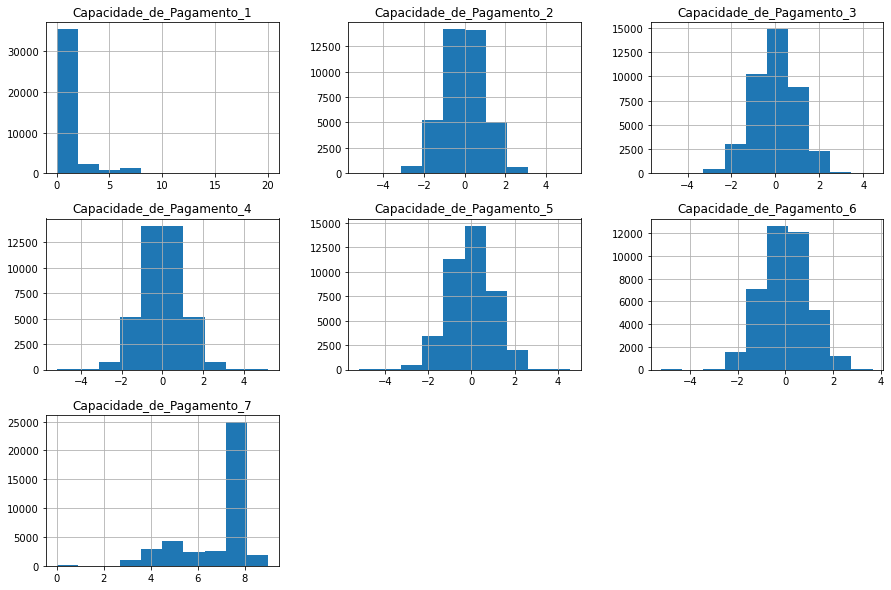

In [ ]:
df[score_columns].hist(figsize=(15, 10));

Capacidade de pagamento
1. Quanto maior o score, menor a capacidade de pagamento
2. Quanto maior o score, menor a capacidade de pagamento
3. Quanto maior o score, maior a capacidade de pagamento
4. Quanto maior o score, maior a capacidade de pagamento
5. Quanto maior o score, maior a capacidade de pagamento
6. Quanto maior o score, maior a capacidade de pagamento
7. Quanto maior o score, maior propensão de ser um perfil digital

In [ ]:
score_columns

['Capacidade_de_Pagamento_1',
 'Capacidade_de_Pagamento_2',
 'Capacidade_de_Pagamento_3',
 'Capacidade_de_Pagamento_4',
 'Capacidade_de_Pagamento_5',
 'Capacidade_de_Pagamento_6',
 'Capacidade_de_Pagamento_7']

In [ ]:
df['Capacidade_de_Pagamento_1'].value_counts(1)

0     0.787375
1     0.098750
2     0.036425
7     0.024775
3     0.022850
4     0.017125
6     0.007475
20    0.002650
15    0.002575
Name: Capacidade_de_Pagamento_1, dtype: float64

In [ ]:
df[df['Capacidade_de_Pagamento_1'] > 0].groupby('fl_renovou')['ID'].count()

fl_renovou
0    8274
1     231
Name: ID, dtype: int64

In [ ]:
df[(df['Capacidade_de_Pagamento_1'] > 0) & (df['fl_renovou'] == 1)]['Capacidade_de_Pagamento_1'].value_counts()

1     93
2     48
7     32
3     29
4     15
6      9
20     3
15     2
Name: Capacidade_de_Pagamento_1, dtype: int64

In [ ]:
df['Capacidade_de_Pagamento_7'].value_counts(1)

8    0.623575
5    0.108550
4    0.071550
7    0.063450
6    0.059175
9    0.045075
3    0.024250
0    0.002200
2    0.001200
1    0.000975
Name: Capacidade_de_Pagamento_7, dtype: float64

In [ ]:
df_aux = df[(df['Capacidade_de_Pagamento_7'] >= 7)]

In [ ]:
df_aux.groupby(['Capacidade_de_Pagamento_7', 'fl_renovou']).ID.count().unstack().reset_index()

fl_renovou,Capacidade_de_Pagamento_7,0,1
0,7,2465,73
1,8,24143,800
2,9,1741,62


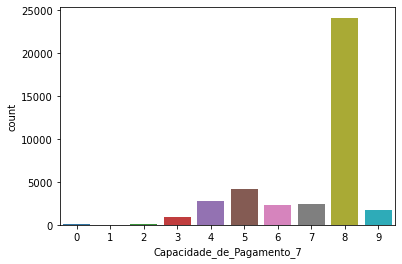

In [ ]:
sns.countplot('Capacidade_de_Pagamento_7', data=df[df['fl_renovou'] == 0]);

* A única coisa que dá pra dizer a partir da análise que eu fiz é que mais de 70% das pessoas que não renovam tem propensão a ter perfil digital, só que as pessoas que renovam também tem um pouco desse perfil digital. O que talvez impacte porque muita gente, assim como eu, não atende ligação e não gosta dessas ligações de telemarketing. Então talvez levar a ideia mesmo de aumentar o contato por meio digital e não só quando está vencendo, mas durante o ano inteiro. Talvez apresentar durante o ano os benefícios que aquele serviço traz pra ela. 
* Sobre as capacidades de pagamento, é bem sutil a diferença entre os grupos que renovam e não renovam. Ao analisar as diferenças dá pra ver que o lado que renova sempre tá um pouco maior para os valores que indicam maior capacidade de pagamento.
* As médias de renda de quem renova é menor que a das pessoas que não renovam. E a maioria das renovações são feitas por pessoas de rendas baixa e média.
* As pessoas que mais renovam são pessoas de meia idade.

In [ ]:
df.groupby(['Grupo_Etario', 'fl_renovou'])['ID'].count().unstack()

fl_renovou,0,1
Grupo_Etario,,
0,1275,20
1,4050,75
2,5566,178
3,4984,174
4,4878,225
5,4593,171
6,4179,139
7,3152,127
8,2501,89


In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO',
       'Cat_Capacidade_de_Pagamento_2', 'Cat_Capacidade_de_Pagamento_3',
       'Cat_Capacidade_de_Pagamento_4', 'Cat_Capacidade_de_Pagamento_5',
       'Cat_Capacidade_de_Pagamento_6', 'CatVrRenda'],
      dtype='object')

In [ ]:
df.groupby(['Grupo_Etario', 'CatVrRenda', 'fl_renovou'])['ID'].count().unstack()

fl_renovou                  0    1
Grupo_Etario CatVrRenda           
0            1            410    5
             2            850   15
             3             13    0
1            1           1309   22
             2           2691   52
             3             39    1
2            1           1705   52
             2           3823  126
             3             33    0
3            1           1384   46
             2           3546  127
             3             46    1
4            1           1156   33
             2           3651  191
             3             68    1
5            1           1252   50
             2           3297  121
             3             38    0
6            1           1086   25
             2           3059  113
             3             32    1
7            1            826   23
             2           2301  103
             3             25    1
8            1            726   22
             2           1764   67
             3              9    0
9            1            955   28
             2           2542   77
             3             17    1

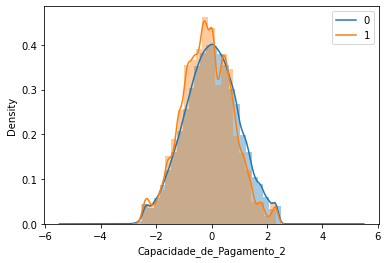

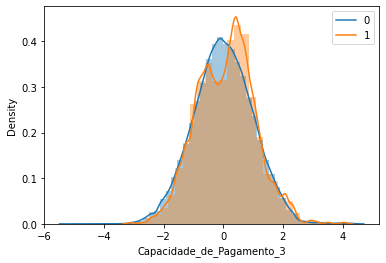

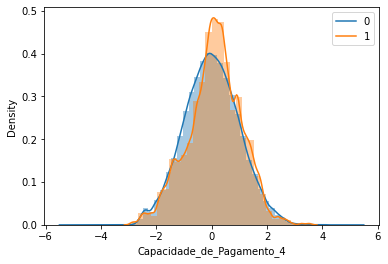

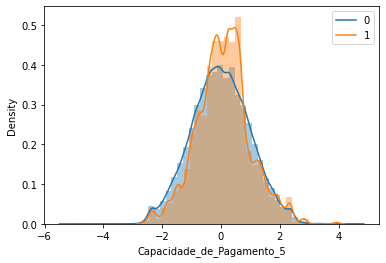

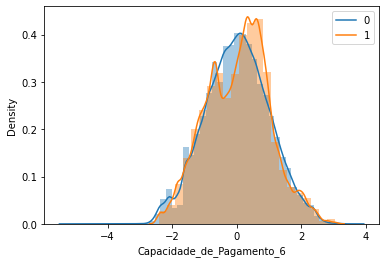

In [ ]:
for i in range(2, 7):
    sns.distplot(df[df['fl_renovou']==0][f'Capacidade_de_Pagamento_{i}'], kde_kws={'bw': 0.1})
    sns.distplot(df[df['fl_renovou']==1][f'Capacidade_de_Pagamento_{i}'], kde_kws={'bw': 0.1})
    plt.legend(['0', '1'])
    plt.show()

* Anotações
    * Na CP1, a maioria (79%) dos dados é 0. Reunindo 0, 1 e 2, passam de 90% dos dados.
        * Considerando que quanto menor o valor, maior a capacidade de pagamento.
    * Na CP7, a maioria tem score 8 (62%) e se considerarmos altos os valores 7, 8 e 9, chega a 73%. (Representa 73% das pessoas que não renovaram)
        * Considerando que quanto maior o score, maior propensão de ser um perfil digital 
        * Ou seja, 73% dos clientes tem propensão a ter perfil digital.
        * Trabalhar a ideia de inserir a BV na vida digital desse cliente durante o ano pode ser uma boa 
        * Comunicações periódicas falando sobre carros, seguros e sobre os benefícios que esse seguro pode ter.  
        * Ligações de telemarketing não são tão bem aceitas.

### Profissão x Perfil digital x Renovação

In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO'],
      dtype='object')

### Renda x Renovação

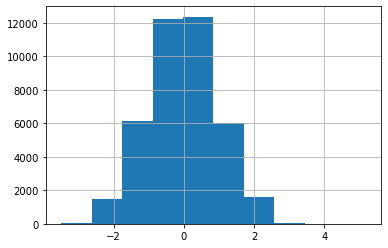

In [ ]:
df['VrRenda'].hist();

In [ ]:
df.groupby(['fl_renovou'])['VrRenda'].describe().T

fl_renovou,0,1
count,38653.000000,1304.000000
mean,-0.023054,0.098065
std,0.981176,0.903810
min,-3.489662,-2.667234
25%,-0.694117,-0.561569
50%,-0.024887,0.112565
75%,0.646931,0.774139
max,5.173669,2.601883


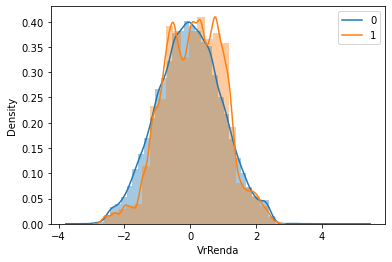

In [ ]:
sns.distplot(df[df['fl_renovou']==0]['VrRenda'], kde_kws={'bw': 0.1})
sns.distplot(df[df['fl_renovou']==1]['VrRenda'], kde_kws={'bw': 0.1})
plt.legend(['0', '1'])
plt.show()

In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO'],
      dtype='object')

In [ ]:
df['CatVrRenda'] = pd.cut(df['VrRenda'], bins=3, labels=['1', '2', '3'])

In [ ]:
df.groupby(['CatVrRenda', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,CatVrRenda,Capacidade_de_Pagamento_7,0,1
0,1,0,22,1
1,1,1,9,0
2,1,2,17,0
3,1,3,248,7
4,1,4,864,22
5,1,5,1281,55
6,1,6,583,11
7,1,7,866,15
8,1,8,6468,179
9,1,9,451,16


In [ ]:
df.groupby(['CdUfNaturalidade', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack().reset_index().fillna(0)

fl_renovou,CdUfNaturalidade,Capacidade_de_Pagamento_7,0,1
0,Centro-oeste,0,10.0,0.0
1,Centro-oeste,1,1.0,0.0
2,Centro-oeste,2,4.0,0.0
3,Centro-oeste,3,69.0,1.0
4,Centro-oeste,4,217.0,4.0
5,Centro-oeste,5,348.0,11.0
6,Centro-oeste,6,146.0,2.0
7,Centro-oeste,7,195.0,4.0
8,Centro-oeste,8,1996.0,54.0
9,Centro-oeste,9,121.0,4.0


In [ ]:
df.groupby(['CdUfNaturalidade', 'Capacidade_de_Pagamento_1', 'fl_renovou'])['ID'].count().unstack().reset_index().fillna(0)

fl_renovou,CdUfNaturalidade,Capacidade_de_Pagamento_1,0,1
0,Centro-oeste,0,2314.0,62.0
1,Centro-oeste,1,428.0,9.0
2,Centro-oeste,2,148.0,6.0
3,Centro-oeste,3,69.0,1.0
4,Centro-oeste,4,57.0,0.0
5,Centro-oeste,6,14.0,0.0
6,Centro-oeste,7,57.0,2.0
7,Centro-oeste,15,14.0,0.0
8,Centro-oeste,20,6.0,0.0
9,Nordeste,0,4510.0,121.0


In [ ]:
df['Cat_Capacidade_de_Pagamento_2'] = pd.cut(df['Capacidade_de_Pagamento_2'], bins=10)
df['Cat_Capacidade_de_Pagamento_3'] = pd.cut(df['Capacidade_de_Pagamento_3'], bins=10)
df['Cat_Capacidade_de_Pagamento_4'] = pd.cut(df['Capacidade_de_Pagamento_4'], bins=10)
df['Cat_Capacidade_de_Pagamento_5'] = pd.cut(df['Capacidade_de_Pagamento_5'], bins=10)
df['Cat_Capacidade_de_Pagamento_6'] = pd.cut(df['Capacidade_de_Pagamento_6'], bins=10)

In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_2', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_2,0,1
0,"(-5.21, -4.159]",1,0
1,"(-4.159, -3.12]",0,0
2,"(-3.12, -2.08]",714,31
3,"(-2.08, -1.04]",5090,191
4,"(-1.04, 4.89e-11]",13653,529
5,"(4.89e-11, 1.04]",13714,437
6,"(1.04, 2.08]",4918,102
7,"(2.08, 3.12]",605,14
8,"(3.12, 4.159]",0,0
9,"(4.159, 5.199]",1,0


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_3', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_3,0,1
0,"(-5.209, -4.238]",1,0
1,"(-4.238, -3.276]",8,0
2,"(-3.276, -2.315]",385,6
3,"(-2.315, -1.353]",2935,78
4,"(-1.353, -0.392]",9944,346
5,"(-0.392, 0.57]",14403,463
6,"(0.57, 1.532]",8619,323
7,"(1.532, 2.493]",2206,80
8,"(2.493, 3.455]",147,6
9,"(3.455, 4.416]",48,2


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_4', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_4,0,1
0,"(-5.21, -4.159]",1,0
1,"(-4.159, -3.12]",1,0
2,"(-3.12, -2.08]",695,23
3,"(-2.08, -1.04]",5037,145
4,"(-1.04, 4.89e-11]",13723,397
5,"(4.89e-11, 1.04]",13523,529
6,"(1.04, 2.08]",4966,190
7,"(2.08, 3.12]",718,18
8,"(3.12, 4.159]",30,2
9,"(4.159, 5.199]",2,0


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_5', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_5,0,1
0,"(-5.209, -4.223]",1,0
1,"(-4.223, -3.247]",2,0
2,"(-3.247, -2.271]",428,11
3,"(-2.271, -1.295]",3381,71
4,"(-1.295, -0.319]",10983,326
5,"(-0.319, 0.657]",14138,596
6,"(0.657, 1.633]",7788,230
7,"(1.633, 2.609]",1909,64
8,"(2.609, 3.585]",62,5
9,"(3.585, 4.561]",4,1


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_6', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_6,0,1
0,"(-5.208, -4.315]",1,0
1,"(-4.315, -3.431]",0,0
2,"(-3.431, -2.547]",58,0
3,"(-2.547, -1.663]",1529,49
4,"(-1.663, -0.778]",6855,239
5,"(-0.778, 0.106]",12307,353
6,"(0.106, 0.99]",11620,467
7,"(0.99, 1.874]",5127,148
8,"(1.874, 2.759]",1165,45
9,"(2.759, 3.643]",34,3


* Anotações
    * A renda das pessoas que renovam tem um valor máximo menor que o das pessoas que não renovam. 


In [ ]:
df.groupby(['CdUfNaturalidade', 'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack().reset_index().fillna(0)

fl_renovou,CdUfNaturalidade,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_7,0,1
0,Centro-oeste,0,0,7.0,0.0
1,Centro-oeste,0,2,4.0,0.0
2,Centro-oeste,0,3,52.0,1.0
3,Centro-oeste,0,4,154.0,1.0
4,Centro-oeste,0,5,291.0,10.0
5,Centro-oeste,0,6,109.0,2.0
6,Centro-oeste,0,7,143.0,4.0
7,Centro-oeste,0,8,1473.0,40.0
8,Centro-oeste,0,9,81.0,4.0
9,Centro-oeste,1,0,2.0,0.0


In [ ]:
df.groupby(['CatVrRenda', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack()

fl_renovou                                0    1
CatVrRenda Capacidade_de_Pagamento_7            
1          0                             22    1
           1                              9    0
           2                             17    0
           3                            248    7
           4                            864   22
           5                           1281   55
           6                            583   11
           7                            866   15
           8                           6468  179
           9                            451   16
2          0                             62    2
           1                             29    1
           2                             31    0
           3                            684   21
           4                           1865   76
           5                           2855  131
           6                           1712   40
           7                           1585   58
           8                          17422  618
           9                           1279   45
3          0                              1    0
           1                              0    0
           2                              0    0
           3                             10    0
           4                             35    0
           5                             15    0
           6                             13    2
           7                             12    0
           8                            228    3
           9                              6    1

In [ ]:
df.groupby(['Grupo_Etario', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack()

fl_renovou                                   0      1
Grupo_Etario Capacidade_de_Pagamento_7               
0            0                             3.0    NaN
             2                             2.0    NaN
             3                            45.0    NaN
             4                            77.0    1.0
             5                            90.0    4.0
             6                           109.0    NaN
             7                            56.0    1.0
             8                           827.0   13.0
             9                            66.0    1.0
1            0                             8.0    NaN
             1                             5.0    NaN
             2                             3.0    NaN
             3                           115.0    NaN
             4                           272.0    2.0
             5                           371.0    8.0
             6                           290.0    1.0
             7                           227.0    6.0
             8                          2539.0   55.0
             9                           220.0    3.0
2            0                            11.0    1.0
             1                             6.0    NaN
             2                             7.0    NaN
             3                           113.0    3.0
             4                           454.0   14.0
             5                           751.0   31.0
             6                           360.0   10.0
             7                           330.0   12.0
             8                          3206.0   91.0
             9                           328.0   16.0
3            0                             9.0    1.0
             1                             6.0    NaN
             2                             9.0    NaN
             3                           106.0    4.0
             4                           399.0   11.0
             5                           512.0   17.0
             6                           310.0   13.0
             7                           333.0   10.0
             8                          3085.0  112.0
             9                           215.0    6.0
4            0                             9.0    NaN
             1                             4.0    NaN
             2                             7.0    NaN
             3                            94.0    4.0
             4                           378.0   14.0
             5                           417.0   26.0
             6                           260.0   10.0
             7                           342.0   13.0
             8                          3169.0  147.0
             9                           198.0   11.0
5            0                            18.0    NaN
             1                             4.0    NaN
             2                             4.0    NaN
             3                           108.0    5.0
             4                           318.0   19.0
             5                           580.0   38.0
             6                           233.0    7.0
             7                           294.0    9.0
             8                          2805.0   90.0
             9                           229.0    3.0
6            0                             6.0    NaN
             1                             1.0    1.0
             2                             5.0    NaN
             3                           118.0    4.0
             4                           221.0    9.0
             5                           391.0   16.0
             6                           214.0    5.0
             7                           241.0    2.0
             8                          2824.0   94.0
             9                           158.0    8.0
7            0                             7.0    1.0
             1                             1.0    NaN
             2                             1.0    NaN
    

In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO',
       'Cat_Capacidade_de_Pagamento_2', 'Cat_Capacidade_de_Pagamento_3',
       'Cat_Capacidade_de_Pagamento_4', 'Cat_Capacidade_de_Pagamento_5',
       'Cat_Capacidade_de_Pagamento_6'],
      dtype='object')

In [ ]:
df_to_cluster = df.drop(['Cat_Capacidade_de_Pagamento_2', 'Cat_Capacidade_de_Pagamento_3',
       'Cat_Capacidade_de_Pagamento_4', 'Cat_Capacidade_de_Pagamento_5',
       'Cat_Capacidade_de_Pagamento_6', 'CdOcupacaoCBO'], axis=1)

df_to_cluster = df_to_cluster.set_index('ID')
label = df_to_cluster['fl_renovou']
df_to_cluster = df_to_cluster.drop('fl_renovou', axis=1)
df_to_cluster['CdUfNaturalidade'] = df_to_cluster['CdUfNaturalidade'].fillna('nao_identificado')
df_to_cluster = df_to_cluster.dropna()
df_to_cluster = pd.get_dummies(df_to_cluster)

In [ ]:
df_to_cluster.isna().sum()

Grupo_Etario                                                                             0
VrRenda                                                                                  0
Capacidade_de_Pagamento_1                                                                0
Capacidade_de_Pagamento_2                                                                0
Capacidade_de_Pagamento_3                                                                0
Capacidade_de_Pagamento_4                                                                0
Capacidade_de_Pagamento_5                                                                0
Capacidade_de_Pagamento_6                                                                0
Capacidade_de_Pagamento_7                                                                0
CdUfNaturalidade_Centro-oeste                                                            0
CdUfNaturalidade_Nordeste                                                                0

In [ ]:
!pip install yellowbrick --quiet

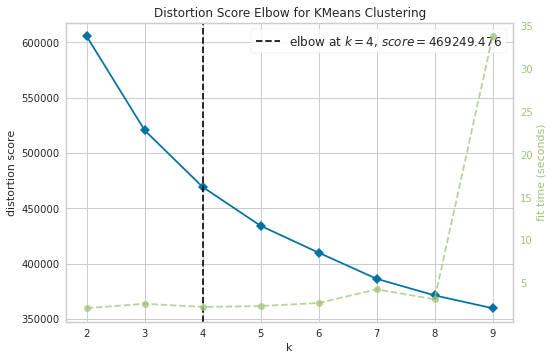

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_to_cluster)
visualizer.show()

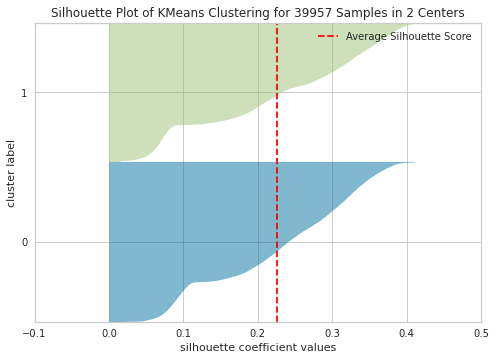

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 39957 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=42))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(2, random_state=42), df_to_cluster, colors='yellowbrick')

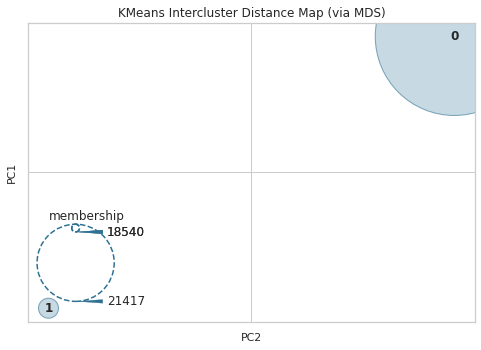

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(2, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(df_to_cluster)
visualizer.show()        

### Naturalidade

In [ ]:
df['CdUfNaturalidade'].value_counts(1)

Sudeste         0.467750
Sul             0.211475
Nordeste        0.137750
Centro-oeste    0.079675
Norte           0.055575
nan             0.047775
Name: CdUfNaturalidade, dtype: float64

In [ ]:
df.groupby(['CdUfNaturalidade', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,CdUfNaturalidade,0,1
0,Centro-oeste,3107,80
1,Nordeste,5375,135
2,Norte,2153,70
3,Sudeste,17954,756
4,Sul,8235,224
5,nan,1872,39


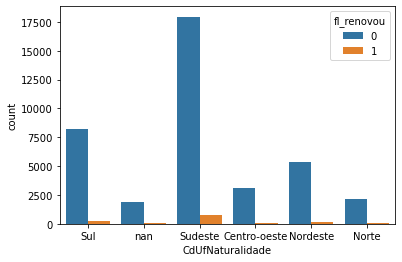

In [ ]:
sns.countplot('CdUfNaturalidade', hue='fl_renovou', data=df);

In [ ]:
df.groupby(['CdUfNaturalidade', 'fl_renovou'])['ID'].count().unstack().reset_index()

In [ ]:
query = """
SELECT 
    ID, 
    CdUfNaturalidade,
    Grupo_Etario,
    VrRenda,
    CdOcupacaoCBO,
    Capacidade_de_Pagamento_1,
    Capacidade_de_Pagamento_2,
    Capacidade_de_Pagamento_3,
    Capacidade_de_Pagamento_4,
    Capacidade_de_Pagamento_5,
    Capacidade_de_Pagamento_6,
    Capacidade_de_Pagamento_7,
    Duracao_segundos,
    fl_renovou 
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019
AND VrMercado <= 2.02
"""
job = client.query(query)
df = job.to_dataframe()

In [ ]:
df_perf_digital = df[df['Capacidade_de_Pagamento_7'] >= 5]

In [ ]:
df_perf_digital.shape

(35993, 14)

In [ ]:
df_perf_digital['fl_renovou'].value_counts()

0    34819
1     1174
Name: fl_renovou, dtype: int64

In [ ]:
# Criação de dataframe com informações de missing data
def verifica_faltantes(data):
    df_faltantes = pd.DataFrame({'tipos': data.dtypes,
                                 'qtd_faltantes': data.isna().sum(),
                                 'percentual_faltante': data.isna().sum() / data.shape[0]},
                                  index=data.columns)
    df_faltantes.sort_values('percentual_faltante', ascending=False, inplace=True)
    return df_faltantes[df_faltantes['percentual_faltante'] > 0]

verifica_faltantes(df_perf_digital)

,tipos,qtd_faltantes,percentual_faltante
Duracao_segundos,float64,21387,0.594199
VrRenda,float64,43,0.001195


In [ ]:
df_perf_digital[df_perf_digital['fl_renovou'] == 1]['Duracao_segundos'].isna().sum()

343

In [ ]:
343/1174

0.2921635434412266

In [ ]:
df_perf_digital[df_perf_digital['fl_renovou'] == 0]['Duracao_segundos'].isna().sum()

21044

In [ ]:
21044/34819

0.6043826646371234

In [ ]:
df_perf_digital.groupby(['fl_renovou'])['Duracao_segundos'].describe().T

fl_renovou,0,1
count,13775.000000,831.000000
mean,185.363848,189.653430
std,313.228188,282.465714
min,13.000000,14.000000
25%,57.000000,68.000000
50%,92.000000,110.000000
75%,158.000000,196.500000
max,4846.000000,3207.000000


In [ ]:
df[df['Capacidade_de_Pagamento_7'] < 5].groupby(['fl_renovou'])['Duracao_segundos'].describe().T

fl_renovou,0,1
count,1435.000000,78.000000
mean,189.926132,155.397436
std,307.811991,254.077723
min,19.000000,24.000000
25%,58.500000,60.250000
50%,94.000000,104.500000
75%,157.500000,133.000000
max,3229.000000,1848.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

pd.options.display.max_rows = 400

In [ ]:
query = """
SELECT 
    ID, 
    CdUfNaturalidade,
    Grupo_Etario,
    VrRenda,
    CdOcupacaoCBO,
    Capacidade_de_Pagamento_1,
    Capacidade_de_Pagamento_2,
    Capacidade_de_Pagamento_3,
    Capacidade_de_Pagamento_4,
    Capacidade_de_Pagamento_5,
    Capacidade_de_Pagamento_6,
    Capacidade_de_Pagamento_7,
    fl_renovou 
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019
AND VrMercado <= 2.02
"""
job = client.query(query)
df = job.to_dataframe()

In [ ]:
df

,ID,CdUfNaturalidade,Grupo_Etario,VrRenda,CdOcupacaoCBO,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,Capacidade_de_Pagamento_7,fl_renovou
0,10,Sul,0,-0.258278,3048,0,0.039955,1.540104,0.306072,-0.403506,-1.234926,8,0
1,23,nan,0,2.374450,7897,0,-0.056944,1.290148,-0.540772,1.821419,1.268513,7,0
2,85,Sudeste,0,-0.409450,Indeterminado,1,-0.879312,1.220721,0.466621,-0.564490,-0.619880,8,0
3,150,Centro-oeste,0,-1.715667,7897,0,0.831527,-1.406802,-0.914333,1.079745,-1.289548,8,0
4,185,Centro-oeste,0,1.730613,10101,0,-0.104382,-0.164728,0.468520,-0.583795,1.745902,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,48257,Sudeste,9,-1.464416,3968,0,0.542741,0.685784,-0.217498,1.491885,0.182898,7,0
39996,48369,Centro-oeste,9,0.463949,7897,0,-2.274228,0.217781,-0.232035,0.588915,0.417226,8,1
39997,48717,Sudeste,9,0.076741,7897,0,-0.820420,-0.045686,0.246019,-0.524125,0.936947,8,0
39998,48762,Sudeste,9,0.143160,5078,0,-0.536905,-0.509857,-0.353478,-0.936563,0.642490,8,0


In [ ]:
map_cbo = pd.read_csv('class_CBO.csv')

In [ ]:
map_cbo.head()

,CdOcupacaoCBO,DsOcupacaoCBO
0,13,SECRETARIO - EXECUTIVO
1,188,VETERINARIO
2,297,ASSISTENTE SOCIAL
3,1103,ENFERMEIRO
4,1191,CONTADOR


In [ ]:
map_cbo.columns

Index(['CdOcupacaoCBO', 'DsOcupacaoCBO'], dtype='object')

In [ ]:
df = df.merge(map_cbo, on='CdOcupacaoCBO')

In [ ]:
df.tail(10)

,ID,CdUfNaturalidade,Grupo_Etario,VrRenda,CdOcupacaoCBO,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,Capacidade_de_Pagamento_7,fl_renovou,DsOcupacaoCBO
39990,41122,Sul,6,1.271434,9170,0,-0.291369,0.729263,1.107113,0.692304,1.507195,8,0,MARCENEIRO
39991,42163,Sudeste,6,1.169463,9170,0,1.184291,-1.213158,1.384826,-0.269314,0.088718,8,1,MARCENEIRO
39992,47699,Sudeste,6,0.664153,9170,0,0.764718,0.851769,0.196283,-0.088935,0.288555,8,0,MARCENEIRO
39993,49410,Sudeste,6,0.291023,9170,0,0.749405,-0.641314,-0.270718,0.678762,0.458649,8,0,MARCENEIRO
39994,32176,Sudeste,6,-1.413778,9170,1,1.605607,-1.118425,-0.592417,0.013105,0.456836,8,0,MARCENEIRO
39995,28900,Sul,7,1.609034,9170,2,1.421266,-0.011119,-1.484057,0.117720,-0.528769,5,0,MARCENEIRO
39996,885,Sul,8,0.828150,9170,0,-0.426775,1.953159,0.901397,0.444635,0.418300,4,0,MARCENEIRO
39997,11534,Sul,9,1.006885,9170,0,-0.353035,-0.214471,1.331127,-0.191460,1.434820,5,0,MARCENEIRO
39998,2811,Sudeste,9,1.126987,9170,0,0.404485,-0.467753,0.140212,-0.064014,0.961685,8,1,MARCENEIRO
39999,48442,Sul,9,1.484042,9170,0,0.677205,-0.026216,-0.086313,0.189655,0.457555,8,0,MARCENEIRO


### Scores - Risco de crédito

In [ ]:
score_columns = df.columns[df.columns.str.contains('Capacidade')].to_list()

In [ ]:
df[score_columns].describe(percentiles=[.1, .15, .25, .75, .9, .95])

,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,Capacidade_de_Pagamento_7
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000
mean,0.618550,-0.017391,0.008367,0.002851,-0.006008,0.008746,7.09855
std,1.861191,0.973639,0.991024,0.992837,0.985354,0.990772,1.57875
min,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.00000
10%,0.000000,-1.291379,-1.263866,-1.273451,-1.280657,-1.282642,4.00000
15%,0.000000,-1.041959,-1.018439,-1.030151,-1.030180,-1.051665,5.00000
25%,0.000000,-0.680394,-0.654675,-0.671689,-0.675104,-0.666616,6.00000
50%,0.000000,-0.011611,0.003785,-0.001507,-0.013405,0.024663,8.00000
75%,0.000000,0.649655,0.674370,0.670776,0.666233,0.687117,8.00000
90%,2.000000,1.246017,1.274051,1.281208,1.270434,1.283831,8.00000


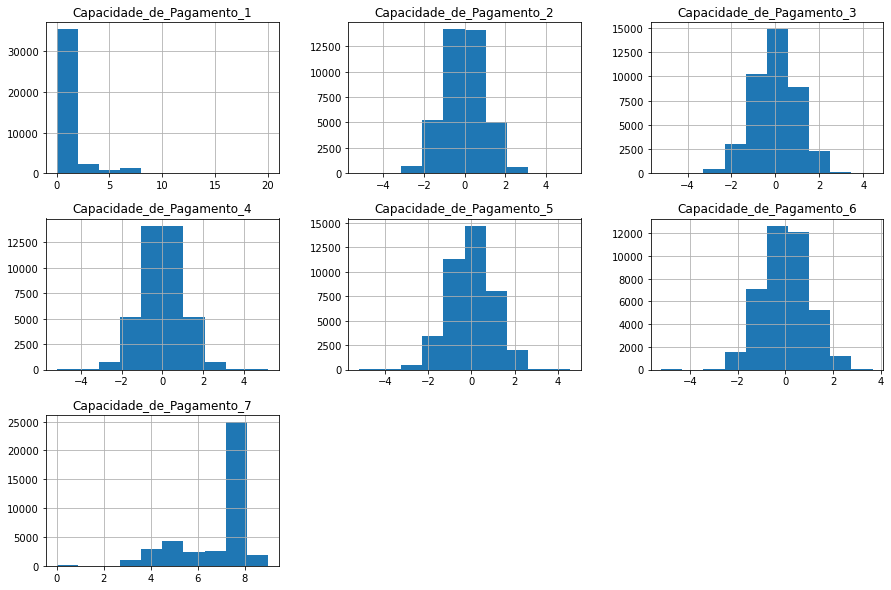

In [ ]:
df[score_columns].hist(figsize=(15, 10));

Capacidade de pagamento
1. Quanto maior o score, menor a capacidade de pagamento
2. Quanto maior o score, menor a capacidade de pagamento
3. Quanto maior o score, maior a capacidade de pagamento
4. Quanto maior o score, maior a capacidade de pagamento
5. Quanto maior o score, maior a capacidade de pagamento
6. Quanto maior o score, maior a capacidade de pagamento
7. Quanto maior o score, maior propensão de ser um perfil digital

In [ ]:
score_columns

['Capacidade_de_Pagamento_1',
 'Capacidade_de_Pagamento_2',
 'Capacidade_de_Pagamento_3',
 'Capacidade_de_Pagamento_4',
 'Capacidade_de_Pagamento_5',
 'Capacidade_de_Pagamento_6',
 'Capacidade_de_Pagamento_7']

In [ ]:
df['Capacidade_de_Pagamento_1'].value_counts(1)

0     0.787375
1     0.098750
2     0.036425
7     0.024775
3     0.022850
4     0.017125
6     0.007475
20    0.002650
15    0.002575
Name: Capacidade_de_Pagamento_1, dtype: float64

In [ ]:
df[df['Capacidade_de_Pagamento_1'] > 0].groupby('fl_renovou')['ID'].count()

fl_renovou
0    8274
1     231
Name: ID, dtype: int64

In [ ]:
df[(df['Capacidade_de_Pagamento_1'] > 0) & (df['fl_renovou'] == 1)]['Capacidade_de_Pagamento_1'].value_counts()

1     93
2     48
7     32
3     29
4     15
6      9
20     3
15     2
Name: Capacidade_de_Pagamento_1, dtype: int64

In [ ]:
df['Capacidade_de_Pagamento_7'].value_counts(1)

8    0.623575
5    0.108550
4    0.071550
7    0.063450
6    0.059175
9    0.045075
3    0.024250
0    0.002200
2    0.001200
1    0.000975
Name: Capacidade_de_Pagamento_7, dtype: float64

In [ ]:
df_aux = df[(df['Capacidade_de_Pagamento_7'] >= 7)]

In [ ]:
df_aux.groupby(['Capacidade_de_Pagamento_7', 'fl_renovou']).ID.count().unstack().reset_index()

fl_renovou,Capacidade_de_Pagamento_7,0,1
0,7,2465,73
1,8,24143,800
2,9,1741,62


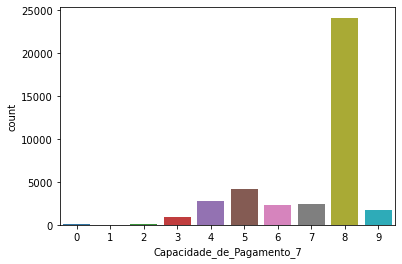

In [ ]:
sns.countplot('Capacidade_de_Pagamento_7', data=df[df['fl_renovou'] == 0]);

* A única coisa que dá pra dizer a partir da análise que eu fiz é que mais de 70% das pessoas que não renovam tem propensão a ter perfil digital, só que as pessoas que renovam também tem um pouco desse perfil digital. O que talvez impacte porque muita gente, assim como eu, não atende ligação e não gosta dessas ligações de telemarketing. Então talvez levar a ideia mesmo de aumentar o contato por meio digital e não só quando está vencendo, mas durante o ano inteiro. Talvez apresentar durante o ano os benefícios que aquele serviço traz pra ela. 
* Sobre as capacidades de pagamento, é bem sutil a diferença entre os grupos que renovam e não renovam. Ao analisar as diferenças dá pra ver que o lado que renova sempre tá um pouco maior para os valores que indicam maior capacidade de pagamento.
* As médias de renda de quem renova é menor que a das pessoas que não renovam. E a maioria das renovações são feitas por pessoas de rendas baixa e média.
* As pessoas que mais renovam são pessoas de meia idade.

In [ ]:
df.groupby(['Grupo_Etario', 'fl_renovou'])['ID'].count().unstack()

fl_renovou,0,1
Grupo_Etario,,
0,1275,20
1,4050,75
2,5566,178
3,4984,174
4,4878,225
5,4593,171
6,4179,139
7,3152,127
8,2501,89


In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO',
       'Cat_Capacidade_de_Pagamento_2', 'Cat_Capacidade_de_Pagamento_3',
       'Cat_Capacidade_de_Pagamento_4', 'Cat_Capacidade_de_Pagamento_5',
       'Cat_Capacidade_de_Pagamento_6', 'CatVrRenda'],
      dtype='object')

In [ ]:
df.groupby(['Grupo_Etario', 'CatVrRenda', 'fl_renovou'])['ID'].count().unstack()

fl_renovou                  0    1
Grupo_Etario CatVrRenda           
0            1            410    5
             2            850   15
             3             13    0
1            1           1309   22
             2           2691   52
             3             39    1
2            1           1705   52
             2           3823  126
             3             33    0
3            1           1384   46
             2           3546  127
             3             46    1
4            1           1156   33
             2           3651  191
             3             68    1
5            1           1252   50
             2           3297  121
             3             38    0
6            1           1086   25
             2           3059  113
             3             32    1
7            1            826   23
             2           2301  103
             3             25    1
8            1            726   22
             2           1764   67
             3              9    0
9            1            955   28
             2           2542   77
             3             17    1

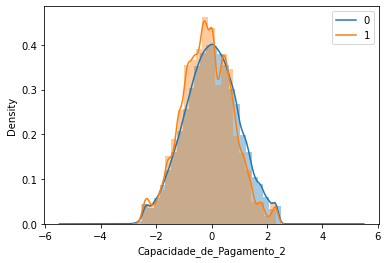

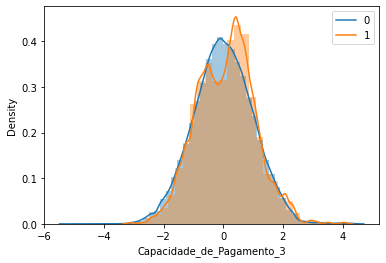

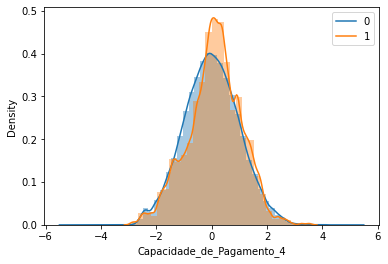

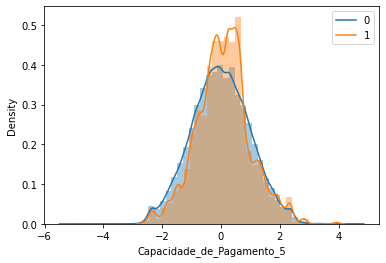

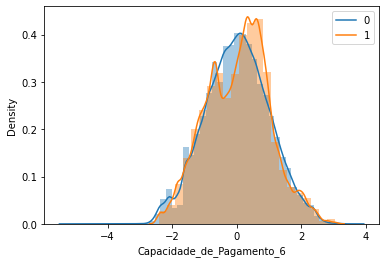

In [ ]:
for i in range(2, 7):
    sns.distplot(df[df['fl_renovou']==0][f'Capacidade_de_Pagamento_{i}'], kde_kws={'bw': 0.1})
    sns.distplot(df[df['fl_renovou']==1][f'Capacidade_de_Pagamento_{i}'], kde_kws={'bw': 0.1})
    plt.legend(['0', '1'])
    plt.show()

* Anotações
    * Na CP1, a maioria (79%) dos dados é 0. Reunindo 0, 1 e 2, passam de 90% dos dados.
        * Considerando que quanto menor o valor, maior a capacidade de pagamento.
    * Na CP7, a maioria tem score 8 (62%) e se considerarmos altos os valores 7, 8 e 9, chega a 73%. (Representa 73% das pessoas que não renovaram)
        * Considerando que quanto maior o score, maior propensão de ser um perfil digital 
        * Ou seja, 73% dos clientes tem propensão a ter perfil digital.
        * Trabalhar a ideia de inserir a BV na vida digital desse cliente durante o ano pode ser uma boa 
        * Comunicações periódicas falando sobre carros, seguros e sobre os benefícios que esse seguro pode ter.  
        * Ligações de telemarketing não são tão bem aceitas.

### Profissão x Perfil digital x Renovação

In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO'],
      dtype='object')

### Renda x Renovação

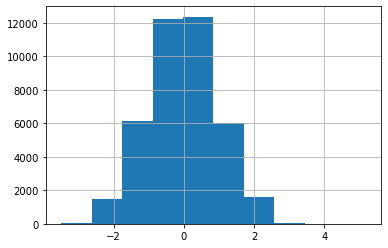

In [ ]:
df['VrRenda'].hist();

In [ ]:
df.groupby(['fl_renovou'])['VrRenda'].describe().T

fl_renovou,0,1
count,38653.000000,1304.000000
mean,-0.023054,0.098065
std,0.981176,0.903810
min,-3.489662,-2.667234
25%,-0.694117,-0.561569
50%,-0.024887,0.112565
75%,0.646931,0.774139
max,5.173669,2.601883


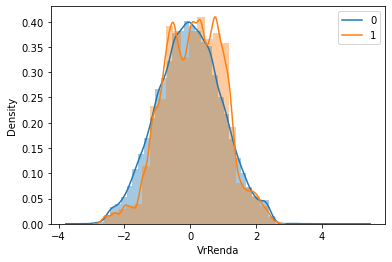

In [ ]:
sns.distplot(df[df['fl_renovou']==0]['VrRenda'], kde_kws={'bw': 0.1})
sns.distplot(df[df['fl_renovou']==1]['VrRenda'], kde_kws={'bw': 0.1})
plt.legend(['0', '1'])
plt.show()

In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO'],
      dtype='object')

In [ ]:
df['CatVrRenda'] = pd.cut(df['VrRenda'], bins=3, labels=['1', '2', '3'])

In [ ]:
df.groupby(['CatVrRenda', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,CatVrRenda,Capacidade_de_Pagamento_7,0,1
0,1,0,22,1
1,1,1,9,0
2,1,2,17,0
3,1,3,248,7
4,1,4,864,22
5,1,5,1281,55
6,1,6,583,11
7,1,7,866,15
8,1,8,6468,179
9,1,9,451,16


In [ ]:
df.groupby(['CdUfNaturalidade', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack().reset_index().fillna(0)

fl_renovou,CdUfNaturalidade,Capacidade_de_Pagamento_7,0,1
0,Centro-oeste,0,10.0,0.0
1,Centro-oeste,1,1.0,0.0
2,Centro-oeste,2,4.0,0.0
3,Centro-oeste,3,69.0,1.0
4,Centro-oeste,4,217.0,4.0
5,Centro-oeste,5,348.0,11.0
6,Centro-oeste,6,146.0,2.0
7,Centro-oeste,7,195.0,4.0
8,Centro-oeste,8,1996.0,54.0
9,Centro-oeste,9,121.0,4.0


In [ ]:
df.groupby(['CdUfNaturalidade', 'Capacidade_de_Pagamento_1', 'fl_renovou'])['ID'].count().unstack().reset_index().fillna(0)

fl_renovou,CdUfNaturalidade,Capacidade_de_Pagamento_1,0,1
0,Centro-oeste,0,2314.0,62.0
1,Centro-oeste,1,428.0,9.0
2,Centro-oeste,2,148.0,6.0
3,Centro-oeste,3,69.0,1.0
4,Centro-oeste,4,57.0,0.0
5,Centro-oeste,6,14.0,0.0
6,Centro-oeste,7,57.0,2.0
7,Centro-oeste,15,14.0,0.0
8,Centro-oeste,20,6.0,0.0
9,Nordeste,0,4510.0,121.0


In [ ]:
df['Cat_Capacidade_de_Pagamento_2'] = pd.cut(df['Capacidade_de_Pagamento_2'], bins=10)
df['Cat_Capacidade_de_Pagamento_3'] = pd.cut(df['Capacidade_de_Pagamento_3'], bins=10)
df['Cat_Capacidade_de_Pagamento_4'] = pd.cut(df['Capacidade_de_Pagamento_4'], bins=10)
df['Cat_Capacidade_de_Pagamento_5'] = pd.cut(df['Capacidade_de_Pagamento_5'], bins=10)
df['Cat_Capacidade_de_Pagamento_6'] = pd.cut(df['Capacidade_de_Pagamento_6'], bins=10)

In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_2', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_2,0,1
0,"(-5.21, -4.159]",1,0
1,"(-4.159, -3.12]",0,0
2,"(-3.12, -2.08]",714,31
3,"(-2.08, -1.04]",5090,191
4,"(-1.04, 4.89e-11]",13653,529
5,"(4.89e-11, 1.04]",13714,437
6,"(1.04, 2.08]",4918,102
7,"(2.08, 3.12]",605,14
8,"(3.12, 4.159]",0,0
9,"(4.159, 5.199]",1,0


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_3', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_3,0,1
0,"(-5.209, -4.238]",1,0
1,"(-4.238, -3.276]",8,0
2,"(-3.276, -2.315]",385,6
3,"(-2.315, -1.353]",2935,78
4,"(-1.353, -0.392]",9944,346
5,"(-0.392, 0.57]",14403,463
6,"(0.57, 1.532]",8619,323
7,"(1.532, 2.493]",2206,80
8,"(2.493, 3.455]",147,6
9,"(3.455, 4.416]",48,2


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_4', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_4,0,1
0,"(-5.21, -4.159]",1,0
1,"(-4.159, -3.12]",1,0
2,"(-3.12, -2.08]",695,23
3,"(-2.08, -1.04]",5037,145
4,"(-1.04, 4.89e-11]",13723,397
5,"(4.89e-11, 1.04]",13523,529
6,"(1.04, 2.08]",4966,190
7,"(2.08, 3.12]",718,18
8,"(3.12, 4.159]",30,2
9,"(4.159, 5.199]",2,0


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_5', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_5,0,1
0,"(-5.209, -4.223]",1,0
1,"(-4.223, -3.247]",2,0
2,"(-3.247, -2.271]",428,11
3,"(-2.271, -1.295]",3381,71
4,"(-1.295, -0.319]",10983,326
5,"(-0.319, 0.657]",14138,596
6,"(0.657, 1.633]",7788,230
7,"(1.633, 2.609]",1909,64
8,"(2.609, 3.585]",62,5
9,"(3.585, 4.561]",4,1


In [ ]:
df.groupby(['Cat_Capacidade_de_Pagamento_6', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,Cat_Capacidade_de_Pagamento_6,0,1
0,"(-5.208, -4.315]",1,0
1,"(-4.315, -3.431]",0,0
2,"(-3.431, -2.547]",58,0
3,"(-2.547, -1.663]",1529,49
4,"(-1.663, -0.778]",6855,239
5,"(-0.778, 0.106]",12307,353
6,"(0.106, 0.99]",11620,467
7,"(0.99, 1.874]",5127,148
8,"(1.874, 2.759]",1165,45
9,"(2.759, 3.643]",34,3


* Anotações
    * A renda das pessoas que renovam tem um valor máximo menor que o das pessoas que não renovam. 


In [ ]:
df.groupby(['CdUfNaturalidade', 'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack().reset_index().fillna(0)

fl_renovou,CdUfNaturalidade,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_7,0,1
0,Centro-oeste,0,0,7.0,0.0
1,Centro-oeste,0,2,4.0,0.0
2,Centro-oeste,0,3,52.0,1.0
3,Centro-oeste,0,4,154.0,1.0
4,Centro-oeste,0,5,291.0,10.0
5,Centro-oeste,0,6,109.0,2.0
6,Centro-oeste,0,7,143.0,4.0
7,Centro-oeste,0,8,1473.0,40.0
8,Centro-oeste,0,9,81.0,4.0
9,Centro-oeste,1,0,2.0,0.0


In [ ]:
df.groupby(['CatVrRenda', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack()

fl_renovou                                0    1
CatVrRenda Capacidade_de_Pagamento_7            
1          0                             22    1
           1                              9    0
           2                             17    0
           3                            248    7
           4                            864   22
           5                           1281   55
           6                            583   11
           7                            866   15
           8                           6468  179
           9                            451   16
2          0                             62    2
           1                             29    1
           2                             31    0
           3                            684   21
           4                           1865   76
           5                           2855  131
           6                           1712   40
           7                           1585   58
           8                          17422  618
           9                           1279   45
3          0                              1    0
           1                              0    0
           2                              0    0
           3                             10    0
           4                             35    0
           5                             15    0
           6                             13    2
           7                             12    0
           8                            228    3
           9                              6    1

In [ ]:
df.groupby(['Grupo_Etario', 'Capacidade_de_Pagamento_7', 'fl_renovou'])['ID'].count().unstack()

fl_renovou                                   0      1
Grupo_Etario Capacidade_de_Pagamento_7               
0            0                             3.0    NaN
             2                             2.0    NaN
             3                            45.0    NaN
             4                            77.0    1.0
             5                            90.0    4.0
             6                           109.0    NaN
             7                            56.0    1.0
             8                           827.0   13.0
             9                            66.0    1.0
1            0                             8.0    NaN
             1                             5.0    NaN
             2                             3.0    NaN
             3                           115.0    NaN
             4                           272.0    2.0
             5                           371.0    8.0
             6                           290.0    1.0
             7                           227.0    6.0
             8                          2539.0   55.0
             9                           220.0    3.0
2            0                            11.0    1.0
             1                             6.0    NaN
             2                             7.0    NaN
             3                           113.0    3.0
             4                           454.0   14.0
             5                           751.0   31.0
             6                           360.0   10.0
             7                           330.0   12.0
             8                          3206.0   91.0
             9                           328.0   16.0
3            0                             9.0    1.0
             1                             6.0    NaN
             2                             9.0    NaN
             3                           106.0    4.0
             4                           399.0   11.0
             5                           512.0   17.0
             6                           310.0   13.0
             7                           333.0   10.0
             8                          3085.0  112.0
             9                           215.0    6.0
4            0                             9.0    NaN
             1                             4.0    NaN
             2                             7.0    NaN
             3                            94.0    4.0
             4                           378.0   14.0
             5                           417.0   26.0
             6                           260.0   10.0
             7                           342.0   13.0
             8                          3169.0  147.0
             9                           198.0   11.0
5            0                            18.0    NaN
             1                             4.0    NaN
             2                             4.0    NaN
             3                           108.0    5.0
             4                           318.0   19.0
             5                           580.0   38.0
             6                           233.0    7.0
             7                           294.0    9.0
             8                          2805.0   90.0
             9                           229.0    3.0
6            0                             6.0    NaN
             1                             1.0    1.0
             2                             5.0    NaN
             3                           118.0    4.0
             4                           221.0    9.0
             5                           391.0   16.0
             6                           214.0    5.0
             7                           241.0    2.0
             8                          2824.0   94.0
             9                           158.0    8.0
7            0                             7.0    1.0
             1                             1.0    NaN
             2                             1.0    NaN
    

In [ ]:
df.columns

Index(['ID', 'CdUfNaturalidade', 'Grupo_Etario', 'VrRenda', 'CdOcupacaoCBO',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'Capacidade_de_Pagamento_7', 'fl_renovou', 'DsOcupacaoCBO',
       'Cat_Capacidade_de_Pagamento_2', 'Cat_Capacidade_de_Pagamento_3',
       'Cat_Capacidade_de_Pagamento_4', 'Cat_Capacidade_de_Pagamento_5',
       'Cat_Capacidade_de_Pagamento_6'],
      dtype='object')

In [ ]:
df_to_cluster = df.drop(['Cat_Capacidade_de_Pagamento_2', 'Cat_Capacidade_de_Pagamento_3',
       'Cat_Capacidade_de_Pagamento_4', 'Cat_Capacidade_de_Pagamento_5',
       'Cat_Capacidade_de_Pagamento_6', 'CdOcupacaoCBO'], axis=1)

df_to_cluster = df_to_cluster.set_index('ID')
label = df_to_cluster['fl_renovou']
df_to_cluster = df_to_cluster.drop('fl_renovou', axis=1)
df_to_cluster['CdUfNaturalidade'] = df_to_cluster['CdUfNaturalidade'].fillna('nao_identificado')
df_to_cluster = df_to_cluster.dropna()
df_to_cluster = pd.get_dummies(df_to_cluster)

In [ ]:
df_to_cluster.isna().sum()

Grupo_Etario                                                                             0
VrRenda                                                                                  0
Capacidade_de_Pagamento_1                                                                0
Capacidade_de_Pagamento_2                                                                0
Capacidade_de_Pagamento_3                                                                0
Capacidade_de_Pagamento_4                                                                0
Capacidade_de_Pagamento_5                                                                0
Capacidade_de_Pagamento_6                                                                0
Capacidade_de_Pagamento_7                                                                0
CdUfNaturalidade_Centro-oeste                                                            0
CdUfNaturalidade_Nordeste                                                                0

In [ ]:
!pip install yellowbrick --quiet

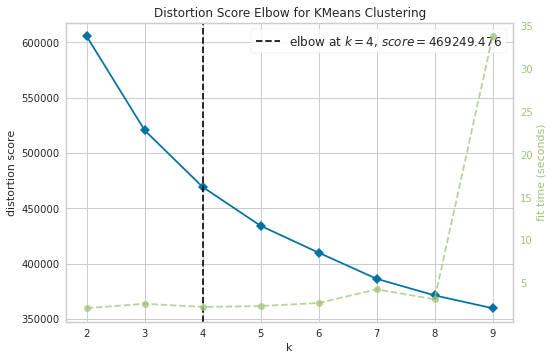

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_to_cluster)
visualizer.show()

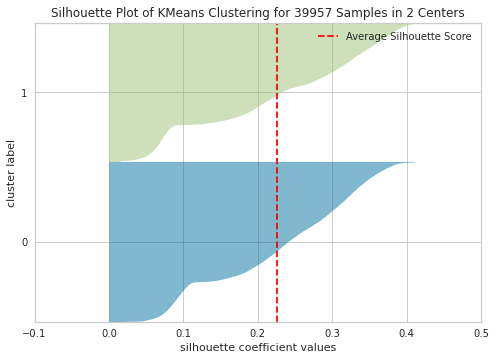

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 39957 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=42))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(2, random_state=42), df_to_cluster, colors='yellowbrick')

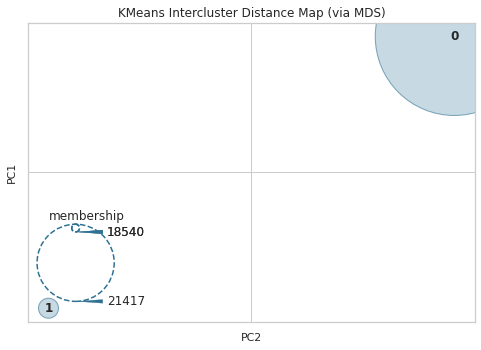

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(2, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(df_to_cluster)
visualizer.show()        

### Naturalidade

In [ ]:
df['CdUfNaturalidade'].value_counts(1)

Sudeste         0.467750
Sul             0.211475
Nordeste        0.137750
Centro-oeste    0.079675
Norte           0.055575
nan             0.047775
Name: CdUfNaturalidade, dtype: float64

In [ ]:
df.groupby(['CdUfNaturalidade', 'fl_renovou'])['ID'].count().unstack().reset_index()

fl_renovou,CdUfNaturalidade,0,1
0,Centro-oeste,3107,80
1,Nordeste,5375,135
2,Norte,2153,70
3,Sudeste,17954,756
4,Sul,8235,224
5,nan,1872,39


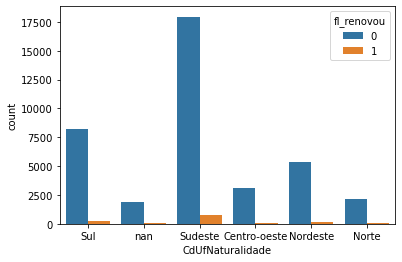

In [ ]:
sns.countplot('CdUfNaturalidade', hue='fl_renovou', data=df);

In [ ]:
df.groupby(['CdUfNaturalidade', 'fl_renovou'])['ID'].count().unstack().reset_index()

In [ ]:
query = """
SELECT 
    ID, 
    CdUfNaturalidade,
    Grupo_Etario,
    VrRenda,
    CdOcupacaoCBO,
    Capacidade_de_Pagamento_1,
    Capacidade_de_Pagamento_2,
    Capacidade_de_Pagamento_3,
    Capacidade_de_Pagamento_4,
    Capacidade_de_Pagamento_5,
    Capacidade_de_Pagamento_6,
    Capacidade_de_Pagamento_7,
    Duracao_segundos,
    fl_renovou 
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019
AND VrMercado <= 2.02
"""
job = client.query(query)
df = job.to_dataframe()

In [ ]:
df_perf_digital = df[df['Capacidade_de_Pagamento_7'] >= 5]

In [ ]:
df_perf_digital.shape

(35993, 14)

In [ ]:
df_perf_digital['fl_renovou'].value_counts()

0    34819
1     1174
Name: fl_renovou, dtype: int64

In [ ]:
# Criação de dataframe com informações de missing data
def verifica_faltantes(data):
    df_faltantes = pd.DataFrame({'tipos': data.dtypes,
                                 'qtd_faltantes': data.isna().sum(),
                                 'percentual_faltante': data.isna().sum() / data.shape[0]},
                                  index=data.columns)
    df_faltantes.sort_values('percentual_faltante', ascending=False, inplace=True)
    return df_faltantes[df_faltantes['percentual_faltante'] > 0]

verifica_faltantes(df_perf_digital)

,tipos,qtd_faltantes,percentual_faltante
Duracao_segundos,float64,21387,0.594199
VrRenda,float64,43,0.001195


In [ ]:
df_perf_digital[df_perf_digital['fl_renovou'] == 1]['Duracao_segundos'].isna().sum()

343

In [ ]:
343/1174

0.2921635434412266

In [ ]:
df_perf_digital[df_perf_digital['fl_renovou'] == 0]['Duracao_segundos'].isna().sum()

21044

In [ ]:
21044/34819

0.6043826646371234

In [ ]:
df_perf_digital.groupby(['fl_renovou'])['Duracao_segundos'].describe().T

fl_renovou,0,1
count,13775.000000,831.000000
mean,185.363848,189.653430
std,313.228188,282.465714
min,13.000000,14.000000
25%,57.000000,68.000000
50%,92.000000,110.000000
75%,158.000000,196.500000
max,4846.000000,3207.000000


In [ ]:
df[df['Capacidade_de_Pagamento_7'] < 5].groupby(['fl_renovou'])['Duracao_segundos'].describe().T

fl_renovou,0,1
count,1435.000000,78.000000
mean,189.926132,155.397436
std,307.811991,254.077723
min,19.000000,24.000000
25%,58.500000,60.250000
50%,94.000000,104.500000
75%,157.500000,133.000000
max,3229.000000,1848.000000
